# Write a function to calculate gini index for the given dataset

x: list of counts
<br>
if we have 30 elements from one class, 40 elements from the second and 50 elements from third then x == [30,40,50]

In [539]:
x=[30,40,50]

def gini(x:list):
    p=[(i/sum(x))**2 for i in x]
    return 1- sum(p) # return gini index

gini(x)

0.6527777777777778

# Write a function to calculate gini index for the given split

x: list of counts for the left dataset 
<br>
y: list of counts for the right dataset

In [80]:
x=[439,74]
y=[62,75]

def split_gini(x:list, y:list):
    px=sum(x)/sum(x+y)
    py=sum(y)/sum(x+y)
    gini_x=1-sum([(i/sum(x))**2 for i in x])
    gini_y=1-sum([(i/sum(y))**2 for i in y])
    return (px*gini_x)+(py*gini_y)
    return gini_y

In [81]:
split_gini(x,y)

0.2992835135439822

# Appply Decision Tree Classifier on the 'classification.csv' dataset from the previous homework.

In [457]:
import pandas as pd
import numpy as np
import random
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics,datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from matplotlib import pyplot as plt
from scipy import stats

In [23]:
df = pd.read_csv('classification.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,college degree,17,12,176,9.3,11.359392,5.008608,1
1,27,no high school,10,6,31,17.3,1.362202,4.000798,0
2,40,no high school,15,14,55,5.5,0.856075,2.168925,0
3,41,no high school,15,14,120,2.9,2.658720,0.821280,0
4,24,high school,2,0,28,17.3,1.787436,3.056564,1


In [468]:
X=pd.get_dummies(df[df.columns.difference(['default'])])
y=df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test)

(560, 140)

In [338]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [339]:
y_pred=clf.predict(X_test)

In [294]:
clf.score(X_test, y_test)

0.7571428571428571

In [295]:
clf.score(X_train, y_train)

0.8035714285714286

In [296]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 12.45
|   |--- feature_5 <= 5.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  6.50
|   |   |   |--- class: 0
|   |--- feature_5 >  5.50
|   |   |--- feature_2 <= 10.33
|   |   |   |--- class: 0
|   |   |--- feature_2 >  10.33
|   |   |   |--- class: 1
|--- feature_3 >  12.45
|   |--- feature_5 <= 9.50
|   |   |--- feature_0 <= 3.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  3.50
|   |   |   |--- class: 1
|   |--- feature_5 >  9.50
|   |   |--- feature_2 <= 4.80
|   |   |   |--- class: 0
|   |   |--- feature_2 >  4.80
|   |   |   |--- class: 1



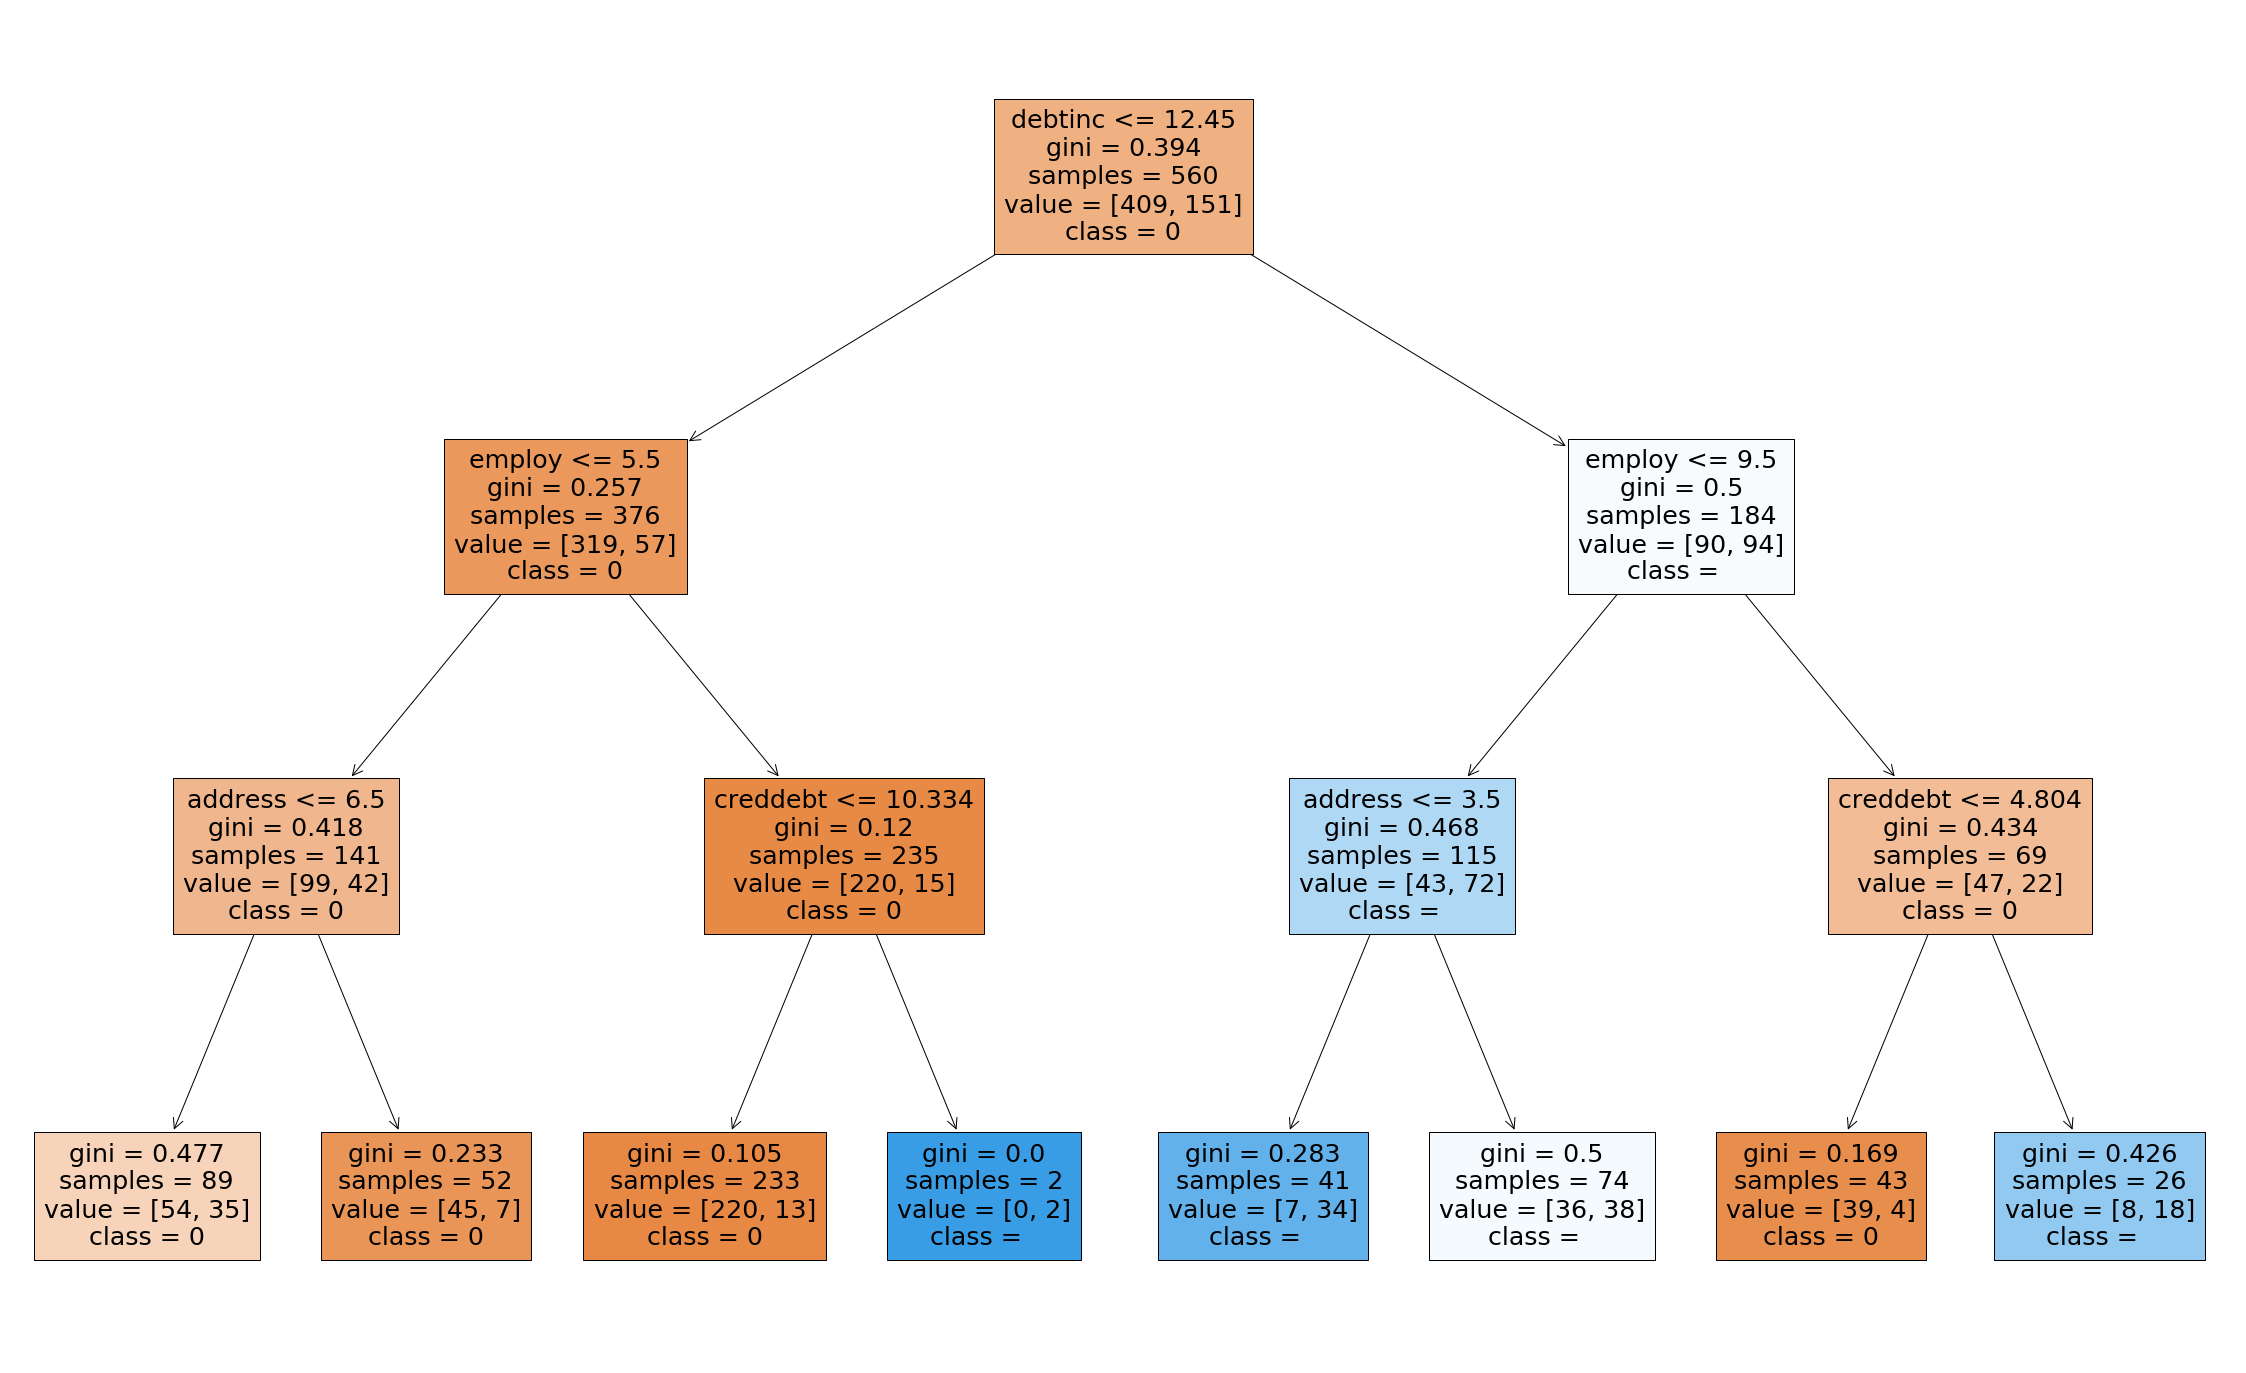

In [298]:
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(clf, feature_names=X.columns,
                   class_names=str(df['default']),
                   filled=True)

# Implement Random Forest

In [537]:
def Bootstrap(X, y):
    n_samples = len(X)
    indices = np.random.choice(n_samples, n_samples, replace=True)
    return X.iloc[indices], y.iloc[indices]


class RandomForest:
    
    def __init__(self, n_trees=5, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.forest = []

    def fit(self, X, y):
        self.forest = []
        for i in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            X_samp, y_samp = Bootstrap(X,y)
            tree.fit(X_samp, y_samp)
            self.forest.append(tree)

    def predict(self, X):
            preds = np.array([tree.predict(X) for tree in self.forest])
            y_preds=stats.mode(preds)
            return y_preds[0]

In [538]:
cls=RandomForest(n_trees=2,max_depth=3)
cls.fit(X_train,y_train)
cls.predict(X_train)

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 